<a href="https://colab.research.google.com/github/Mahalakshmi013/Student-Registeration-System/blob/main/ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Import necessary libraries for data manipulation, visualization, and deep learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# PyTorch libraries for building and training the neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Libraries for data preprocessing and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
# Load the training and testing datasets
train_data = pd.read_csv('/content/covid.train.csv')
test_data = pd.read_csv('/content/covid.test.csv')

In [120]:
# Display the first few rows of the training data to understand its structure
print("Train Data Head:")
display(train_data.head(10))

Train Data Head:


,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.091433,43.290957,15.214655,1.641667,14.778802,12.417256,16.134238,52.560315,43.321985,20.178428
5,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.679396,43.345340,15.548976,1.873230,15.346263,12.951090,16.523990,52.185260,43.600100,18.131814
6,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.970599,43.632334,16.179562,2.077821,15.249744,13.111449,17.261584,52.544181,42.750387,15.517490
7,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.682459,44.525243,16.449065,2.011220,15.126717,13.124831,17.018251,52.621585,42.707477,15.961637
8,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.156434,44.877576,16.720348,1.997892,15.031244,12.670960,16.842015,52.491832,43.775117,13.068527
9,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.661191,44.603474,16.671175,2.022002,14.535698,12.270574,16.915207,52.402077,43.534666,15.178088


In [73]:
print("\nTest DataFrame Head:")
display(test_df.head(10))


Test DataFrame Head:


,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,52.071090,8.624001,29.374792,5.391413,2.754804,19.695098,13.685645,24.747837,66.194950,44.873473
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.742461,21.720187,41.375784,9.450179,3.150088,22.075715,17.302077,23.559622,57.015009,38.372829
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.109045,20.123959,40.072556,8.781522,2.888209,23.920870,18.342506,24.993341,55.291498,38.907257
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.442267,16.083529,36.977612,5.199286,2.575347,21.073800,12.087171,18.608723,67.036197,43.142779
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.588783,19.503010,42.631236,11.549771,8.530551,15.896575,11.781634,15.065228,61.196518,43.574676
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.208096,20.932030,42.384261,17.525521,1.844029,24.355805,15.845985,19.607680,61.899137,42.474476
6,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.884470,16.842757,41.879157,14.410091,1.781317,17.528730,12.245313,15.303880,62.024175,51.079529
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.412126,18.953060,36.791356,8.398736,1.897908,16.254480,14.455884,21.569030,57.687391,45.025582
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.078475,21.268897,38.959481,12.568350,1.857510,16.596772,9.908960,14.731024,59.047152,42.079862
9,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.617801,9.267016,30.628272,6.963351,2.879581,16.727494,12.638718,23.053152,59.765142,43.329327


In [74]:
print("\nTrain DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)


Train DataFrame Shape: (2700, 95)
Test DataFrame Shape: (893, 94)


In [75]:
print("Missing values in train_df:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Missing values in train_df:
Series([], dtype: int64)


In [76]:
print("\nMissing values in test_df:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])


Missing values in test_df:
Series([], dtype: int64)


In [77]:
print("Data types in train_df:")
print(train_df.info())

Data types in train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2700 non-null   int64  
 1   AL                      2700 non-null   float64
 2   AK                      2700 non-null   float64
 3   AZ                      2700 non-null   float64
 4   AR                      2700 non-null   float64
 5   CA                      2700 non-null   float64
 6   CO                      2700 non-null   float64
 7   CT                      2700 non-null   float64
 8   FL                      2700 non-null   float64
 9   GA                      2700 non-null   float64
 10  ID                      2700 non-null   float64
 11  IL                      2700 non-null   float64
 12  IN                      2700 non-null   float64
 13  IA                      2700 non-null   float64
 14  KS              

In [78]:
print("\nData types in test_df:")
print(test_df.info())


Data types in test_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      893 non-null    int64  
 1   AL                      893 non-null    float64
 2   AK                      893 non-null    float64
 3   AZ                      893 non-null    float64
 4   AR                      893 non-null    float64
 5   CA                      893 non-null    float64
 6   CO                      893 non-null    float64
 7   CT                      893 non-null    float64
 8   FL                      893 non-null    float64
 9   GA                      893 non-null    float64
 10  ID                      893 non-null    float64
 11  IL                      893 non-null    float64
 12  IN                      893 non-null    float64
 13  IA                      893 non-null    float64
 14  KS                

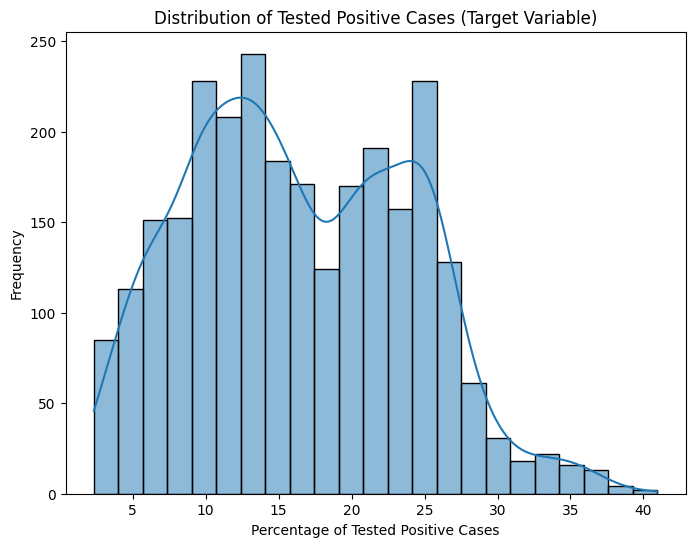

In [130]:
# Visualize the distribution of the target variable in the training data.

plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Tested Positive Cases (Target Variable)')
plt.xlabel('Percentage of Tested Positive Cases')
plt.ylabel('Frequency')
plt.show()

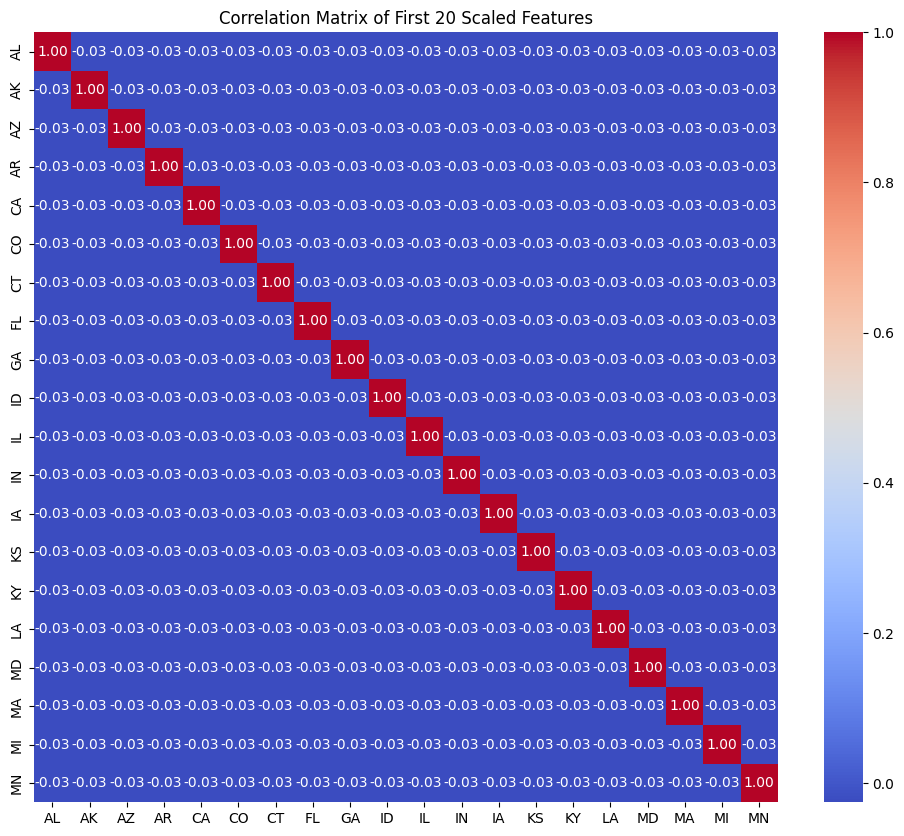

In [132]:
# Visualize the correlation matrix

num_features_to_visualize = 20
correlation_subset = X_train_scaled_df.iloc[:, :num_features_to_visualize].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix of First {num_features_to_visualize} Scaled Features')
plt.show()

In [79]:
# Separating features and target in the training data

X_train = train_df.drop(['id', 'tested_positive.2'], axis=1)
y_train = train_df['tested_positive.2']

In [80]:
# Separating features in the test data
X_test = test_df.drop('id', axis=1)

In [81]:
# Identifying numerical columns to scale (excluding 'id' and state columns which are already one-hot encoded). Based on train_df.info(), all columns except 'id' and the target are float64

numerical_cols = X_train.columns

In [82]:
# Initializing and fit the scaler on the training data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

In [83]:
# Transforming the test data using the fitted scaler.

X_test_scaled = scaler.transform(X_test[numerical_cols])

In [84]:
# Converting scaled arrays back to dataframes to maintain column names.

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)

In [85]:
# Displaying the first few rows of the scaled dataframes.

print("Scaled X_train_scaled_df Head:")
display(X_train_scaled_df.head())

Scaled X_train_scaled_df Head:


,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.616993,1.280254,1.105434,1.257963,-0.743719,-1.181592,-0.595804,-0.938460,-1.743507,-0.184324
1,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.526352,1.257347,1.070250,1.251957,-0.706464,-1.261331,-0.767543,-1.010515,-1.712317,-0.363726
2,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.546762,1.241598,1.095181,1.259765,-0.672597,-1.044791,-0.431687,-1.096812,-1.800507,-0.305105
3,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.365041,1.061616,1.033920,1.128379,-0.767087,-1.232177,-0.516313,-1.180935,-1.991994,-0.317520
4,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.225699,0.975685,1.084474,1.058007,-0.706650,-1.461922,-0.394016,-1.148165,-1.973648,-0.238280


In [86]:
print("\nScaled X_test_scaled_df Head:")
display(X_test_scaled_df.head())


Scaled X_test_scaled_df Head:


,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,6.268852,-0.159519,-0.159519,-0.159519,-0.159519,...,-0.673979,-1.407705,-1.006946,-1.038559,0.350509,0.723424,0.384955,2.032823,0.218790,0.058312
1,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,0.800812,0.909984,0.796648,-0.172300,0.725914,1.781634,2.605958,1.594017,-1.257337,-1.184389
2,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,0.881851,0.627493,0.600790,-0.315011,0.477205,2.601826,3.244929,2.123488,-1.534476,-1.082225
3,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,0.071263,-0.087560,0.135660,-1.079565,0.180076,1.336272,-0.596736,-0.234342,0.354062,-0.272538
4,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,-0.159519,...,1.208965,0.517600,0.985326,0.275814,5.835799,-0.965060,-0.784379,-1.542949,-0.584954,-0.189974


In [87]:
class RegressionDNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionDNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [88]:
loss_function = torch.nn.MSELoss()

In [89]:
# Instantiating the model (assuming input_size is the number of features in X_train_scaled_df).

input_size = X_train_scaled_df.shape[1]
model = RegressionDNN(input_size)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [90]:
# Converting scaled training features and target to PyTorch tensors and reshapping y to match model output shape.

X_train_tensor = torch.tensor(X_train_scaled_df.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

In [91]:
num_epochs = 100
batch_size = 32

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

RegressionDNN(
  (layer_1): Linear(in_features=93, out_features=64, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [92]:
print(f"Training the model on {device}...")
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')
print("Model Training finished.")

Training the model on cpu...
Epoch [1/100], Loss: 190.7089
Epoch [10/100], Loss: 1.6511
Epoch [20/100], Loss: 1.0782
Epoch [30/100], Loss: 0.9494
Epoch [40/100], Loss: 0.8546
Epoch [50/100], Loss: 0.8003
Epoch [60/100], Loss: 0.7755
Epoch [70/100], Loss: 0.7367
Epoch [80/100], Loss: 0.6868
Epoch [90/100], Loss: 0.6725
Epoch [100/100], Loss: 0.6251
Model Training finished.


In [93]:
# Converting scaled testing features to a PyTorch tensor.

X_test_tensor = torch.tensor(X_test_scaled_df.values, dtype=torch.float32)

In [94]:
# Moving the test data to the same device as the model.

X_test_tensor = X_test_tensor.to(device)
model.eval()

RegressionDNN(
  (layer_1): Linear(in_features=93, out_features=64, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [95]:
# Gradient calculations.

with torch.no_grad():
    test_outputs = model(X_test_tensor)
test_predictions = test_outputs.cpu().numpy()
print("Test predictions generated.")
print("First 10 predictions:")
print(test_predictions[:10].flatten())

Test predictions generated.
First 10 predictions:
[20.13956    6.272669   7.5456157 10.632509   3.2558026 27.638985
 23.556564   4.17174   10.755551   8.340701 ]


## Hyperparameter tuning and regularization

### Subtask:
Experiment with different hyperparameters and regularization techniques to improve model performance.


In [96]:
# Hyperparameter Tuning and Regularization.

class RegressionDNN(nn.Module):
    def __init__(self, input_size, dropout_rate=0.0):
        super(RegressionDNN, self).__init__()
        self.layer_1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.layer_2 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [97]:
# Converting scaled training features and target to PyTorch tensors.

X_train_tensor = torch.tensor(X_train_scaled_df.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

In [98]:
# Defining hyperparameter combinations.

learning_rates = [0.01, 0.001, 0.0001]
dropout_rates = [0.0, 0.2, 0.5]
weight_decays = [0.0, 1e-5, 1e-4]

In [99]:
num_epochs = 100
batch_size = 32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_loss = float('inf')
best_hyperparameters = {}
history = {}

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print(f"Experimenting with hyperparameters on {device}...")

Experimenting with hyperparameters on cpu...


In [100]:
for lr in learning_rates:
    for dropout_rate in dropout_rates:
        for weight_decay in weight_decays:
            print(f"\nTraining with LR: {lr}, Dropout: {dropout_rate}, Weight Decay: {weight_decay}")

            model = RegressionDNN(X_train_scaled_df.shape[1], dropout_rate=dropout_rate).to(device)
            loss_function = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

            run_history = []

            for epoch in range(num_epochs):
                model.train()
                total_loss = 0
                for batch_X, batch_y in train_loader:
                    batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                    outputs = model(batch_X)
                    loss = loss_function(outputs, batch_y)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    total_loss += loss.item()

                avg_loss = total_loss / len(train_loader)
                run_history.append(avg_loss)
                if (epoch + 1) % 10 == 0 or epoch == 0:
                     print(f'  Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
            history[f'lr_{lr}_dropout_{dropout_rate}_decay_{weight_decay}'] = run_history
            model.eval()
            with torch.no_grad():
                 train_preds = model(X_train_tensor.to(device))
                 current_loss = loss_function(train_preds, y_train_tensor.to(device)).item()
            print(f"  Final Training Loss for this run: {current_loss:.4f}")
            if current_loss < best_loss:
                best_loss = current_loss
                best_hyperparameters = {'lr': lr, 'dropout_rate': dropout_rate, 'weight_decay': weight_decay}

print("\nHyperparameter tuning complete.")
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Training Loss: {best_loss:.4f}")


Training with LR: 0.01, Dropout: 0.0, Weight Decay: 0.0
  Epoch [1/100], Loss: 35.5130
  Epoch [10/100], Loss: 1.4248
  Epoch [20/100], Loss: 1.2102
  Epoch [30/100], Loss: 1.1178
  Epoch [40/100], Loss: 1.4616
  Epoch [50/100], Loss: 1.0447
  Epoch [60/100], Loss: 1.2489
  Epoch [70/100], Loss: 0.9954
  Epoch [80/100], Loss: 0.8457
  Epoch [90/100], Loss: 1.0208
  Epoch [100/100], Loss: 0.8220
  Final Training Loss for this run: 0.6429

Training with LR: 0.01, Dropout: 0.0, Weight Decay: 1e-05
  Epoch [1/100], Loss: 37.0867
  Epoch [10/100], Loss: 1.5213
  Epoch [20/100], Loss: 1.2907
  Epoch [30/100], Loss: 1.1339
  Epoch [40/100], Loss: 1.0878
  Epoch [50/100], Loss: 1.1291
  Epoch [60/100], Loss: 1.0115
  Epoch [70/100], Loss: 0.8590
  Epoch [80/100], Loss: 0.9081
  Epoch [90/100], Loss: 0.7777
  Epoch [100/100], Loss: 0.7522
  Final Training Loss for this run: 0.7840

Training with LR: 0.01, Dropout: 0.0, Weight Decay: 0.0001
  Epoch [1/100], Loss: 39.5070
  Epoch [10/100], Loss:

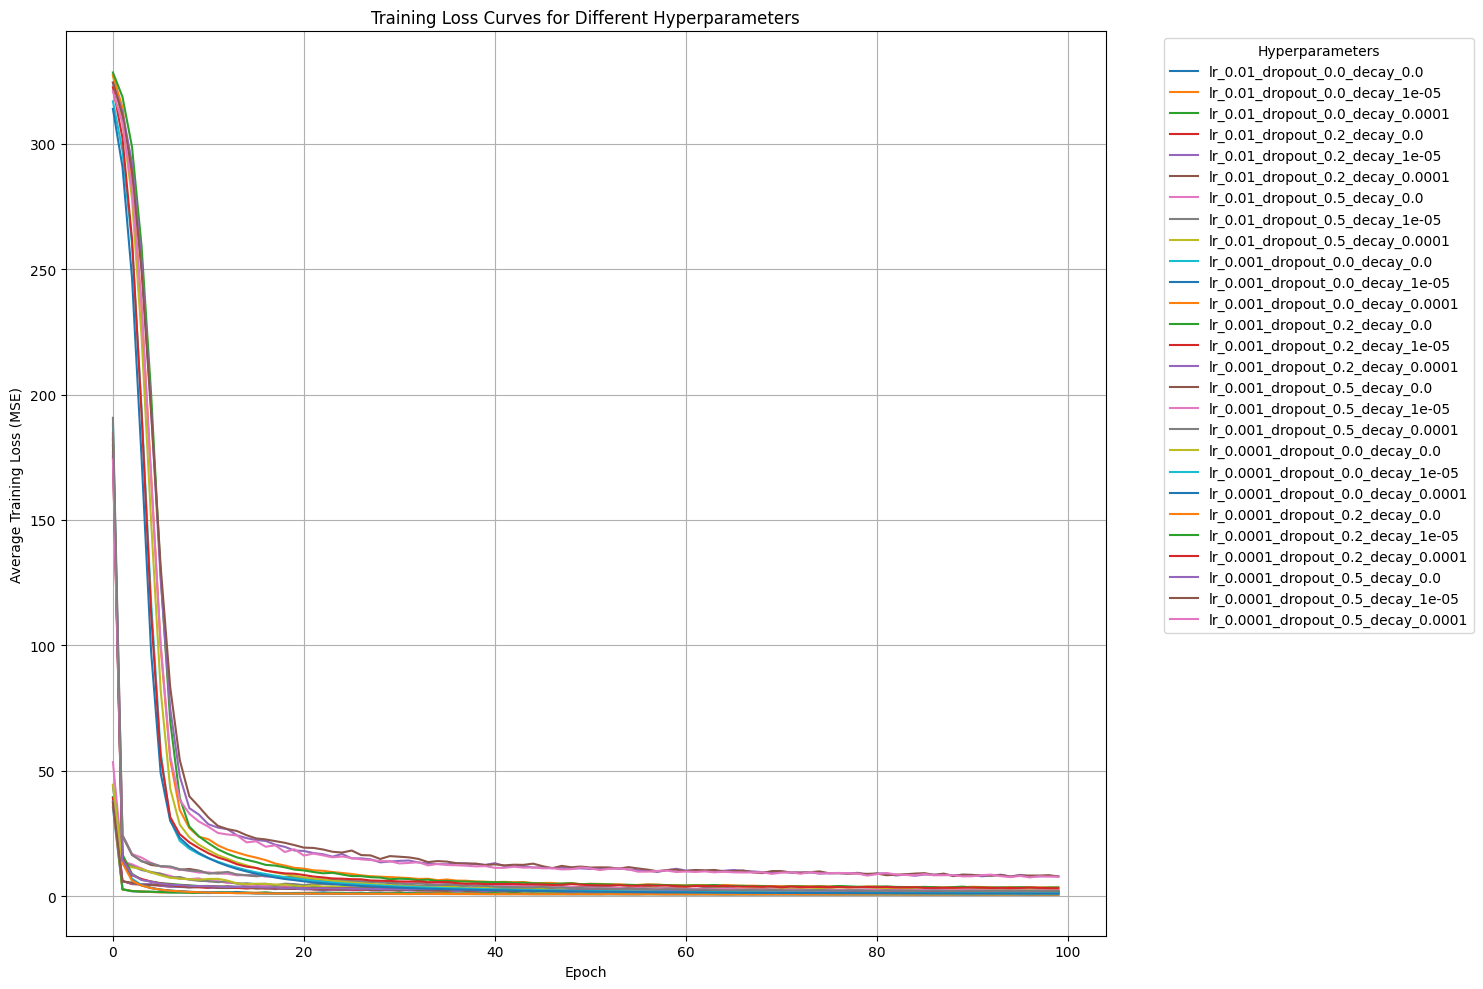

In [101]:
# Plotting the training history for different hyperparameter combinations

plt.figure(figsize=(15, 10))

for label, run_loss in history.items():
    plt.plot(run_loss, label=label)
plt.title('Training Loss Curves for Different Hyperparameters')
plt.xlabel('Epoch')
plt.ylabel('Average Training Loss (MSE)')
plt.legend(title='Hyperparameters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Training Loss: {best_loss:.4f}")

Best Hyperparameters: {'lr': 0.001, 'dropout_rate': 0.0, 'weight_decay': 1e-05}
Best Training Loss: 0.6322


In [103]:
# Feature selection.

train_for_corr = X_train_scaled_df.copy()
train_for_corr['tested_positive.2'] = y_train.values

In [104]:
# Calculating correlation matrix.

correlation_matrix = train_for_corr.corr()
target_correlation = correlation_matrix['tested_positive.2'].sort_values(ascending=False)

print("Correlation of features with the target variable:")
print(target_correlation)

Correlation of features with the target variable:
tested_positive.2    1.000000
tested_positive.1    0.991012
tested_positive      0.981165
hh_cmnty_cli         0.879724
hh_cmnty_cli.1       0.879438
                       ...   
shop.1              -0.412705
shop.2              -0.415130
public_transit      -0.448360
public_transit.1    -0.449079
public_transit.2    -0.450436
Name: tested_positive.2, Length: 94, dtype: float64


In [105]:
# Using a Random Forest Regression model for feature importance.

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature importances from Random Forest:")
print(feature_importances)


Feature importances from Random Forest:
tested_positive.1       9.834090e-01
ili.2                   7.135558e-04
cli.2                   7.066536e-04
tested_positive         7.003856e-04
travel_outside_state    5.011205e-04
                            ...     
FL                      3.918114e-07
WA                      2.547549e-07
MA                      1.862382e-07
NY                      1.791752e-07
CA                      1.671786e-07
Length: 93, dtype: float64


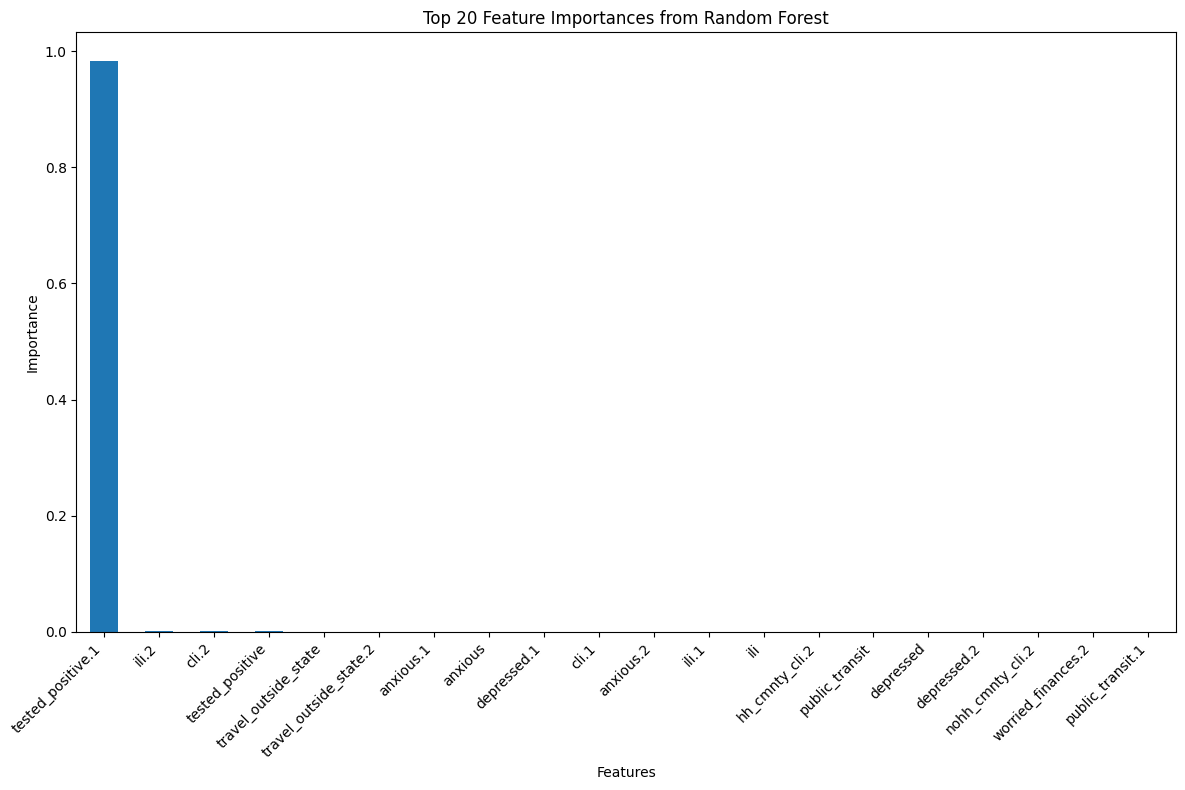

In [124]:
# Plotting feature importances from Random Forest

plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar') # Plotting top 20 for clarity
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [106]:
# Selecting Top Features.

selected_features = feature_importances[feature_importances > 0.005].index.tolist()
correlated_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()

In [107]:
# Combining the lists and remove duplicates, excluding the target variable itself.

combined_selected_features = list(set(selected_features + correlated_features))
if 'tested_positive.2' in combined_selected_features:
    combined_selected_features.remove('tested_positive.2')
print(f"\nSelected features based on importance (>0.005) and correlation (abs > 0.1):")
print(combined_selected_features)


Selected features based on importance (>0.005) and correlation (abs > 0.1):
['travel_outside_state.2', 'ID', 'anxious', 'CT', 'worried_finances.1', 'public_transit.1', 'spent_time.1', 'MA', 'restaurant.2', 'AK', 'AZ', 'hh_cmnty_cli.1', 'worried_become_ill', 'MI', 'anxious.2', 'NY', 'nohh_cmnty_cli', 'cli.2', 'WA', 'CA', 'public_transit', 'anxious.1', 'OH', 'OR', 'worried_finances', 'ili', 'KY', 'cli', 'tested_positive', 'worried_become_ill.1', 'OK', 'worried_become_ill.2', 'hh_cmnty_cli', 'NE', 'shop.2', 'UT', 'NV', 'spent_time', 'shop.1', 'public_transit.2', 'travel_outside_state.1', 'shop', 'hh_cmnty_cli.2', 'FL', 'CO', 'cli.1', 'ili.1', 'TX', 'IA', 'ili.2', 'nohh_cmnty_cli.1', 'MD', 'spent_time.2', 'nohh_cmnty_cli.2', 'MS', 'restaurant.1', 'restaurant', 'worried_finances.2', 'MO', 'tested_positive.1', 'PA']


In [134]:
# Creating new DataFrames with selected features.

X_train_selected = X_train_scaled_df[combined_selected_features]
X_test_selected = X_test_scaled_df[combined_selected_features]

print("\nShape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

display(X_train_selected.head())
display(X_test_selected.head())


Shape of X_train_selected: (2700, 61)
Shape of X_test_selected: (893, 61)


,travel_outside_state.2,ID,anxious,CT,worried_finances.1,public_transit.1,spent_time.1,MA,restaurant.2,AK,...,MD,spent_time.2,nohh_cmnty_cli.2,MS,restaurant.1,restaurant,worried_finances.2,MO,tested_positive.1,PA
0,1.245997,-0.159519,-1.147735,-0.159519,-0.175577,-0.688057,1.231923,-0.159519,1.280254,-0.159519,...,-0.159519,1.105434,-0.352568,-0.160735,1.246403,1.259967,-0.184324,-0.160735,0.496339,-0.160735
1,1.110775,-0.159519,-1.234450,-0.159519,-0.179102,-0.747109,1.088632,-0.159519,1.257347,-0.159519,...,-0.159519,1.070250,-0.410374,-0.160735,1.268232,1.234164,-0.363726,-0.160735,0.568865,-0.160735
2,1.216405,-0.159519,-1.185427,-0.159519,-0.357931,-0.709857,1.053496,-0.159519,1.241598,-0.159519,...,-0.159519,1.095181,-0.419195,-0.160735,1.245359,1.255961,-0.305105,-0.160735,0.645966,-0.160735
3,1.072394,-0.159519,-1.265213,-0.159519,-0.299497,-0.675993,1.078393,-0.159519,1.061616,-0.159519,...,-0.159519,1.033920,-0.399259,-0.160735,1.229634,1.233122,-0.317520,-0.160735,0.629410,-0.160735
4,1.004971,-0.159519,-1.048544,-0.159519,-0.311873,-0.770474,1.017215,-0.159519,0.975685,-0.159519,...,-0.159519,1.084474,-0.411824,-0.160735,1.049923,1.217420,-0.238280,-0.160735,0.462871,-0.160735


,travel_outside_state.2,ID,anxious,CT,worried_finances.1,public_transit.1,spent_time.1,MA,restaurant.2,AK,...,MD,spent_time.2,nohh_cmnty_cli.2,MS,restaurant.1,restaurant,worried_finances.2,MO,tested_positive.1,PA
0,-1.467294,-0.159519,0.852068,-0.159519,0.057557,0.232892,-0.946512,-0.159519,-1.407705,-0.159519,...,-0.159519,-1.006946,0.681943,-0.160735,-1.408178,-1.397122,0.058312,-0.160735,0.611393,-0.160735
1,-0.570737,-0.159519,2.260195,-0.159519,-1.102856,0.711146,0.781611,-0.159519,0.909984,-0.159519,...,-0.159519,0.796648,-1.806293,-0.160735,0.855004,0.727022,-1.184389,-0.160735,-1.882374,-0.160735
2,-0.537240,-0.159519,3.048966,-0.159519,-0.970391,0.434516,0.467588,-0.159519,0.627493,-0.159519,...,-0.159519,0.600790,-1.884950,-0.160735,0.541183,0.391035,-1.082225,-0.160735,-1.862445,-0.160735
3,2.746277,-0.159519,2.255966,-0.159519,-0.360130,0.385574,0.166911,-0.159519,-0.087560,-0.159519,...,-0.159519,0.135660,-0.689167,-0.160735,-0.003808,0.033431,-0.272538,-0.160735,-0.683898,-0.160735
4,-0.567814,-0.159519,-0.884058,-0.159519,-0.169222,5.589010,0.986572,-0.159519,0.517600,-0.159519,...,-0.159519,0.985326,-2.031505,-0.160735,0.570104,0.608879,-0.189974,-0.160735,-1.815003,-0.160735


In [109]:
# Converting the selected training features and target to PyTorch tensors.

X_train_tensor = torch.tensor(X_train_selected.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

In [110]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [135]:
# Instantiating the RegressionDNN model with selected features and best hyperparameters.

input_size = X_train_selected.shape[1]
best_dropout_rate = best_hyperparameters['dropout_rate']
model = RegressionDNN(input_size, dropout_rate=best_dropout_rate).to(device)

# Defining the loss function.
loss_function = nn.MSELoss()

# Defining the optimizer with best hyperparameters.
best_lr = best_hyperparameters['lr']
best_weight_decay = best_hyperparameters['weight_decay']
optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

# Implementing the training loop.
num_epochs = 50 # As determined in hyperparameter tuning
print(f"Training the model for {num_epochs} epochs...")

Training the model for 50 epochs...


In [112]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')
print("Training finished.")

Epoch [1/50], Average Loss: 195.8884
Epoch [10/50], Average Loss: 1.8008
Epoch [20/50], Average Loss: 1.2036
Epoch [30/50], Average Loss: 0.9616
Epoch [40/50], Average Loss: 0.8570
Epoch [50/50], Average Loss: 0.8222
Training finished.


In [113]:
# Converting the selected testing features X_test_selected to a PyTorch tensor.

X_test_selected_tensor = torch.tensor(X_test_selected.values, dtype=torch.float32)
device = next(model.parameters()).device
X_test_selected_tensor = X_test_selected_tensor.to(device)
print(f"Testing data moved to device: {device}")

Testing data moved to device: cpu


In [114]:
model.eval()
print("Model set to evaluation mode.")

Model set to evaluation mode.


In [115]:
with torch.no_grad():
    test_predictions_tensor = model(X_test_selected_tensor)

In [116]:
test_predictions_cpu = test_predictions_tensor.cpu()
test_predictions_selected_features = test_predictions_cpu.numpy()
print("\nFirst 10 test predictions using selected features:")
print(test_predictions_selected_features[:10].flatten())


First 10 test predictions using selected features:
[20.436308   7.1099095  7.8405995 13.821263   3.0435007 26.915653
 24.59548    8.239157  10.937067   9.366723 ]


In [142]:
# Calculate regression evaluation metrics on the training data
# We use the training data here as we have the true labels (y_train)
# For the test data, we only have predictions and not the true labels.

train_predictions_tensor = model(X_train_tensor.to(device))
train_predictions_cpu = train_predictions_tensor.detach().cpu().numpy()
y_train_numpy = y_train_tensor.cpu().numpy()

# Calculate metrics
mse = mean_squared_error(y_train_numpy, train_predictions_cpu)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_numpy, train_predictions_cpu)
r2 = r2_score(y_train_numpy, train_predictions_cpu)

print("Regression Evaluation Metrics on Training Data:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R-squared (R2): {r2:.4f}")

Regression Evaluation Metrics on Training Data:
  Mean Squared Error (MSE): 331.3161
  Root Mean Squared Error (RMSE): 18.2021
  Mean Absolute Error (MAE): 16.5190
  R-squared (R2): -4.7091


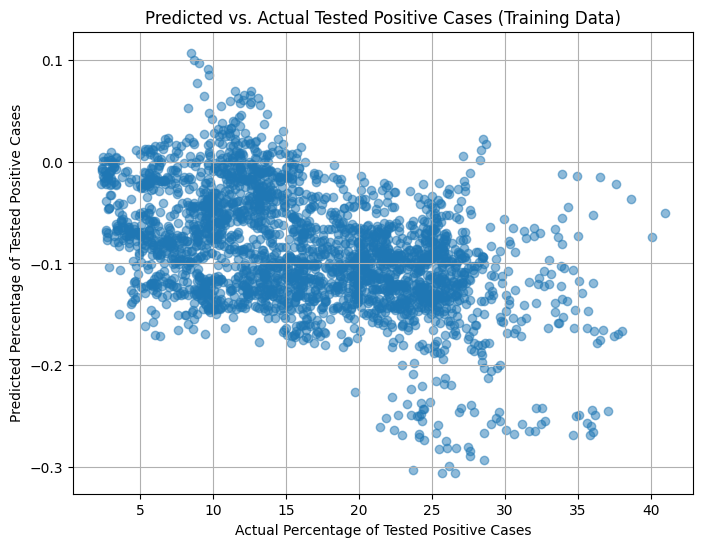

In [143]:
# Visualize predicted vs. actual values on the training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train_numpy, train_predictions_cpu, alpha=0.5)
plt.title('Predicted vs. Actual Tested Positive Cases (Training Data)')
plt.xlabel('Actual Percentage of Tested Positive Cases')
plt.ylabel('Predicted Percentage of Tested Positive Cases')
plt.grid(True)
plt.show()